In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import interp1d

# Interpolation and Regression

## Least Squares Regression (Linear Regression)

These are the equations to determine the $m$ and $c$ of "best fit line" if the relationship between dependent and indipendent varibles are linear ($y=mx + c$).  
$$
Δ = n \left( Σx_i^2 \right) - \left( Σx_i \right)^2\\
m = \frac{n\left( Σx_iy_i \right) - \left( Σx_i \right)\left( Σy_i \right)}{Δ}\\
c = \frac{\left( Σx_i^2 \right) \left( Σy_i \right) - \left( Σx_i \right) \left( Σx_iy_i \right)}{Δ}
$$
Here $n$ is the number of points.  
Ex: The simple harmonic motion of an object attached to a spring.  
$$
T = 2π\sqrt{\frac{m}{k}} \\
T^2 = \left (\frac{4\pi^2}{k}\right )m \\
⇒ y = bx
$$

In [2]:
mass = np.array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9])
period = np.array([1.4, 2.4, 3.1, 3.7, 4.2, 4.6, 5.1, 5.4, 5.7, 6.14])
period_square = period**2

n = len(mass)
delta = n*np.sum(mass**2) - np.sum(mass)**2
m = (n*np.sum(mass*period_square) - np.sum(mass)*np.sum(period_square)) / delta
c = (np.sum(mass**2)*np.sum(period_square) - np.sum(mass)*np.sum(mass*period_square)) / delta
print(m, c)

# best fit line
y = m*mass + c

19.605951515151503 -0.08799151515149513


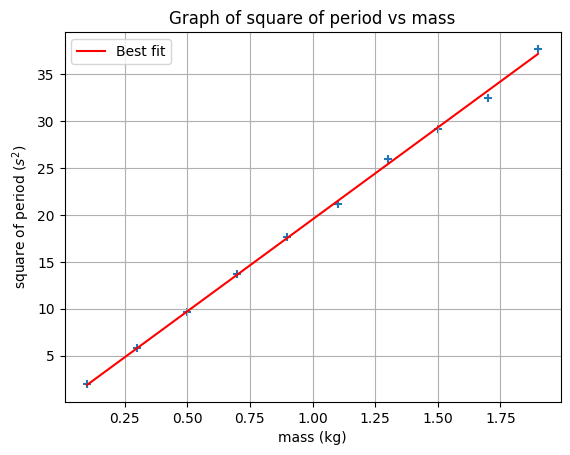

In [3]:
plt.figure()
plt.scatter(mass, period_square, marker='+')
plt.plot(mass, y, color="red", label = "Best fit")
plt.title("Graph of square of period vs mass")
plt.xlabel("mass (kg)")
plt.ylabel("square of period ($s^2$)")
plt.grid()
plt.legend()
plt.show()

Instead of using mathematical method, $np.polyfit$ method can be used.

In [4]:
# By polyfit command
m_polyfit, c_polyfit = np.polyfit(mass, period_square, 1)
print(m_polyfit, c_polyfit)

y_polyfit = m_polyfit*mass + c_polyfit

19.605951515151514 -0.08799151515150722


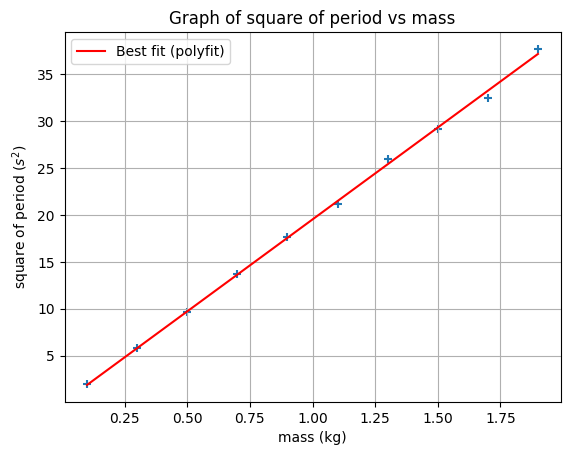

In [5]:
plt.figure()
plt.scatter(mass, period_square, marker='+')
plt.plot(mass, y_polyfit, color="red", label = "Best fit (polyfit)")
plt.title("Graph of square of period vs mass")
plt.xlabel("mass (kg)")
plt.ylabel("square of period ($s^2$)")
plt.grid()
plt.legend()
plt.show()

## Polynomial Regression

For this $np.polyfit$ and $np.polyval$ methods can be used.

In [6]:
u = np.array([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
p = np.array([1.3, 2.7, 4.9, 8.1, 12.5, 18.9, 27.3, 37.7, 50.1, 64.5])

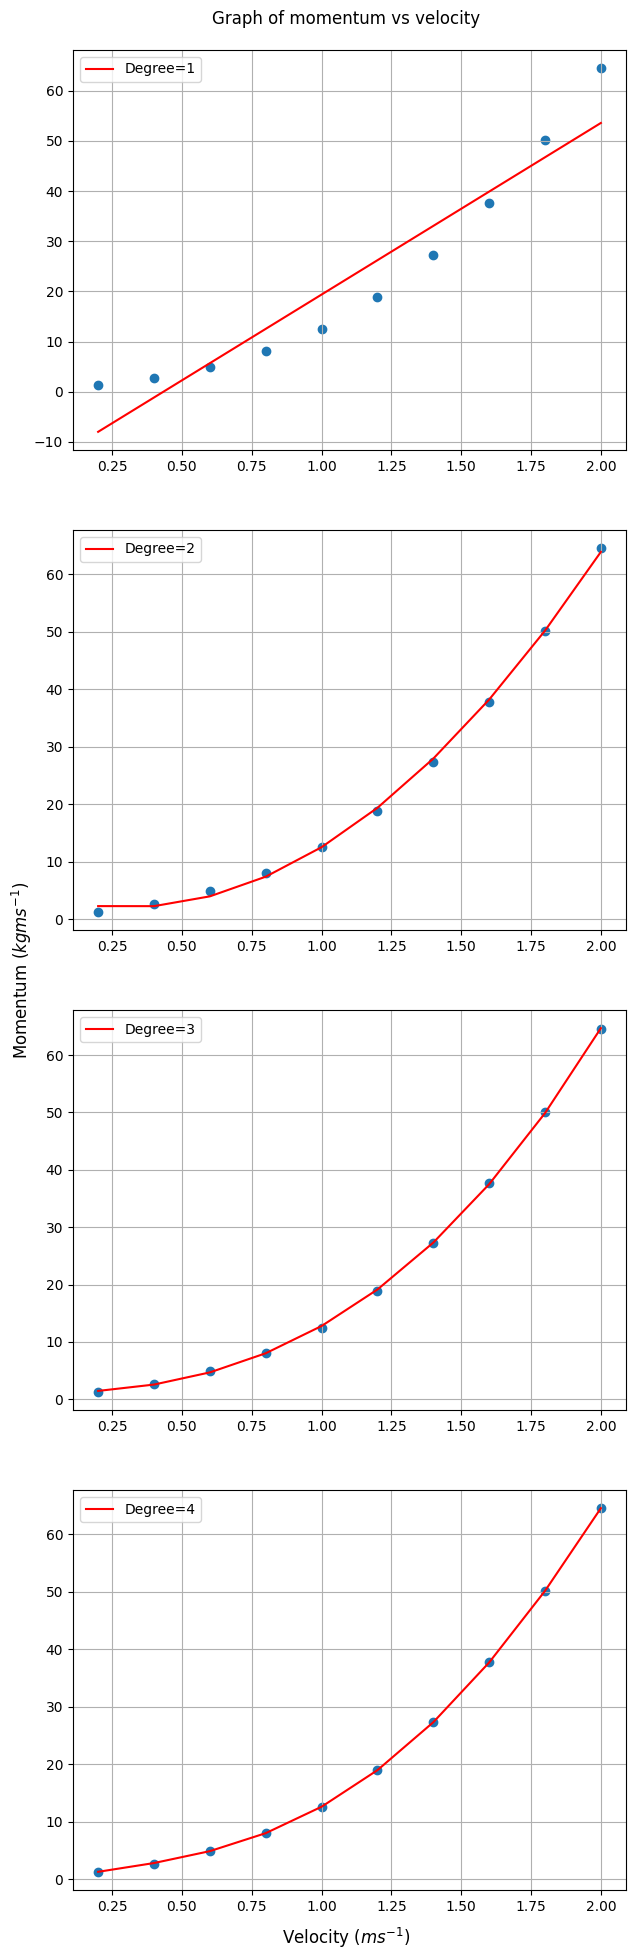

In [7]:
# Check the best fit curve for different degree of polynomial functions
fig, axes = plt.subplots(4, 1)
fig.set_size_inches(w=7, h=20)
plt.suptitle("Graph of momentum vs velocity")
plt.subplots_adjust(top=0.96, bottom=0.04, left=0.11)
for degree in range(1, 5):
  coefficients = np.polyfit(u, p, degree)
  p_predicted = np.polyval(coefficients, u)

  axes[degree - 1].scatter(u, p)
  axes[degree - 1].plot(u, p_predicted, color="red", label=f"Degree={degree}")
  axes[degree - 1].legend()
  axes[degree - 1].grid()

fig.supxlabel('Velocity ($ms^{-1}$)')
fig.supylabel("Momentum ($kgms^{-1}$)")
plt.show()

The goodness of the curve can be evaluated using coefficient of determination ($R^2$) method.
$$
R^2 = 1 - \frac{SSE}{SST}
$$
Here,
$$
SSE = \text{Sum of Squared Errors} = ∑_{i=1}^{n} \left( y_i - f(x_i) \right)^2\\
SST = \text{Sum of the squares of
the residual distances between the data and its mean} = ∑_{i=1}^{n} \left( y_i - \bar{y} \right)^2\\
$$
The coefficient of determination takes values between 0 and 1, where 1 represents a perfect fit, and 0 represents complete randomness.

In [8]:
# determine best fit curve
for degree in range(1, 5):
  coefficients = np.polyfit(u, p, degree)
  p_predicted = np.polyval(coefficients, u)

  SSE = np.sum((p - p_predicted)**2)
  SST = np.sum((p - np.mean(p))**2)
  R_square = 1 - (SSE/SST)
  print(f"Degree {degree} - Mean Square Error = {SSE/len(p)} \t R square = {R_square}")

Degree 1 - Mean Square Error = 39.068799999999996 	 R square = 0.9080842253852488
Degree 2 - Mean Square Error = 0.37486060606060495 	 R square = 0.9991180787999986
Degree 3 - Mean Square Error = 0.03485314685314671 	 R square = 0.9999180022424347
Degree 4 - Mean Square Error = 0.003384615384615352 	 R square = 0.9999920371359026


## Lagrange Polynomial interpolation

For this $lagrange$ method can be used which is defined in $scipy.interpolate$. (Refer AM2013 course notes for more details)

In [9]:
t = np.array([0, 1, 2, 3, 4, 5])
h = np.array([0, 5, 20, 45, 80, 125])

In [10]:
# print interpolant function
interpolant = lagrange(t, h)
print(interpolant)

           5             3     2
4.441e-16 x - 1.421e-14 x + 5 x - 3.553e-15 x


In [11]:
# coefficients of interpolant function
print(interpolant.coef)

[ 4.44089210e-16  0.00000000e+00 -1.42108547e-14  5.00000000e+00
 -3.55271368e-15  0.00000000e+00]


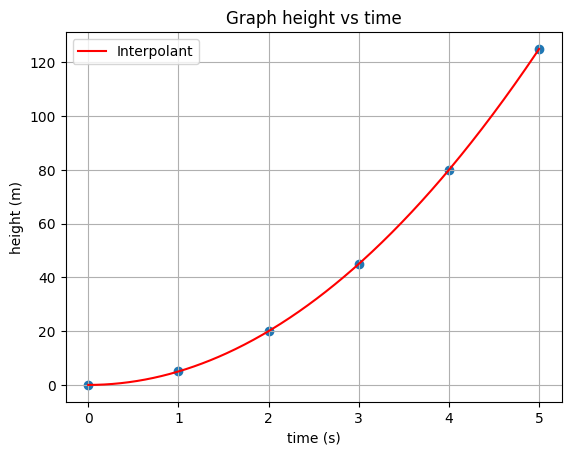

In [12]:
plt.figure()
plt.scatter(t, h)
plt.plot(np.linspace(t[0], t[-1], 500), interpolant(np.linspace(t[0], t[-1], 500)), color="red", label="Interpolant")
plt.title("Graph height vs time")
plt.xlabel("time (s)")
plt.ylabel("height (m)")
plt.grid()
plt.legend()
plt.show()

## Linear Interpolation (Linear Splines)

For this $interp1d$ method can be used which is defined in $scipy.interpolate$. (Refer AM2013 course notes for more details)

In [13]:
t = np.array([0, 1, 2, 3, 4, 5])
h = np.array([0, 5, 20, 45, 80, 125])

In [14]:
# get the linear interpolant
linear_interpolant = interp1d(t, h)

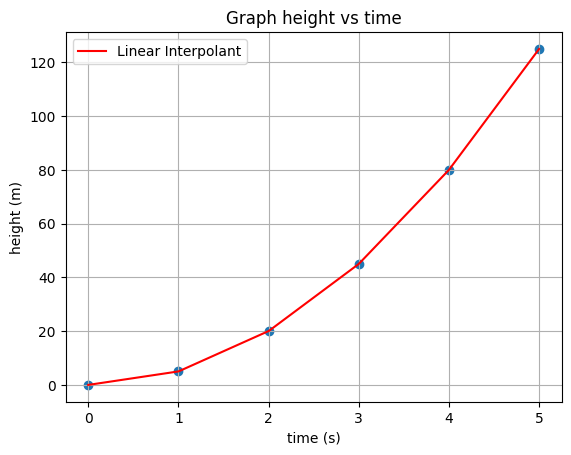

In [15]:
plt.figure()
plt.scatter(t, h)
plt.plot(np.linspace(t[0], t[-1], 500), linear_interpolant(np.linspace(t[0], t[-1], 500)), color="red", label="Linear Interpolant")
plt.title("Graph height vs time")
plt.xlabel("time (s)")
plt.ylabel("height (m)")
plt.legend()
plt.grid()
plt.show()